In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

#### Menentukan independent variable dan dependent variable

In [3]:
# independent_var merupakan variable yang mempengaruhi dependent_var
# independent_var sebagai data x, dependent_var sebagai data y

independent_var = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
dependent_var = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

In [4]:
# number of observations/points
n = np.size(independent_var)

#### Menghitung cross deviation dan squared deviation

In [5]:
# menghitung rata-rata (mean) untuk menghitung cross deviation dan squared deviation

# mean of x and y vector
mean_indep_var = np.mean(independent_var)
mean_dep_var = np.mean(dependent_var)

# Fungsi cross deviation dan squared deviation adalah untuk membuat garis linear yang menggambarkan posisi dependent variable yang akan diprediksi

# Calculating cross-deviation and deviation about x
cross_deviation = np.sum(dependent_var * independent_var) - n * mean_dep_var * mean_indep_var
squared_deviation = np.sum(independent_var * independent_var) - n * mean_indep_var * mean_indep_var

#### Menampilkan penyebaran data independent menggunakan scatter di Matplotlib

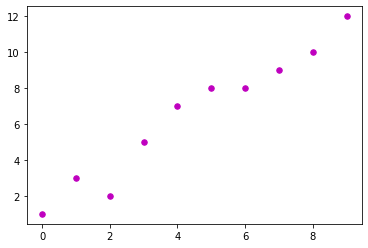

In [6]:
# calculating regression coefficients
b_1 = cross_deviation / squared_deviation
b_0 = mean_dep_var - b_1 * mean_indep_var

# plotting the actual points as scatter plot
plt.scatter(independent_var, dependent_var, color="m", marker="o", s=30)

# predicted response vector
y_pred = b_0 + b_1 * independent_var

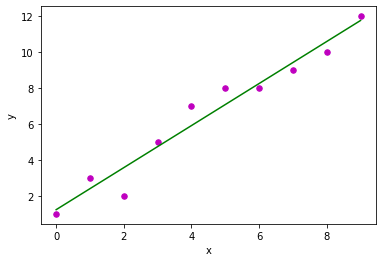

In [7]:
# plotting the regression line
plt.plot(independent_var, y_pred, color="g")

# putting labels
plt.xlabel('x')
plt.ylabel('y')

# function to show plot
plt.scatter(independent_var, dependent_var, color="m", marker="o", s=30)
plt.show()

## Prediksi Suhu

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
dataset = pd.read_csv("weather.csv", header=0)
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


#### Menentukan variable x & y

In [10]:
# Kita akan melakukan prediksi MaxTemp berdasarkan MinTemp
# maka MaxTemp sebagai dependent variable (y) dan MinTemp sebagai independent variable (x)
# kolom yang akan digunakan adalah MinTemp dan MaxTemp

dataTemp = dataset[['MinTemp', 'MaxTemp']]
dataTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  366 non-null    float64
 1   MaxTemp  366 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


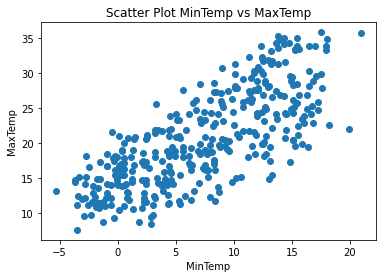

In [11]:
# Melihat korelasi data menggunakan Scatter plot

plt.scatter(dataTemp['MinTemp'], dataTemp['MaxTemp'])
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('Scatter Plot MinTemp vs MaxTemp')
plt.show()

Pada scatter plot di atas, dapat dilihat bahwa hubungan dari MinTemp dan MaxTemp memiliki korelasi positif yang signifikan. Dari gambar tersebut terlihat bahwa semakin besar minimum temperatur pada suhu, maka maksimum temperatur juga cenderung meningkat.

#### Data modeling dengan Linear Regression

In [12]:
x = dataTemp['MinTemp'].values.reshape(-1, 1)
y = dataTemp['MaxTemp'].values.reshape(-1, 1)

# reshape(-1, 1) untuk mengubah susunan data menjadi row ke samping

In [13]:
# membagi data training dan data testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [14]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
LinReg.score(x_test, y_test)

0.5720332780594177

In [15]:
# Hasil akurasi yang diperoleh adalah sebesar 0.6017726005925131 atau 60%

Text(0.5, 1.0, 'Plot MinTemp vs MaxTemp')

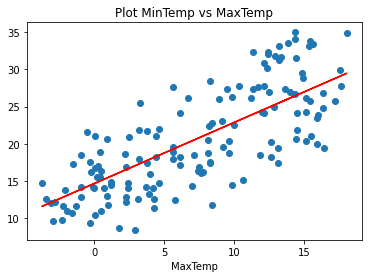

In [16]:
# Function score pada object LinReg tersebut merupakan tingkat akurasi dari data modelling menggunakan Linear Regression untuk melakukan prediksi terhadap suhu maksimal dari suhu minimal.
# Jika diimplementasikan, maka output dari Linear Regression ini akan berbentuk seperti berikut.

y_predict = LinReg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('MinTemp')
plt.xlabel('MaxTemp')
plt.title('Plot MinTemp vs MaxTemp')

## Logistic Regression

#### Pada Linear Regression, data modellingnya hanya menggunakan 1 variable independent, tetapi Logistic Regression menggunakan lebih dari 1 variable independent.

Logistic Regression dapat melakukan prediksi akan terjadinya hujan atau tidak berdasarkan variable-variable yang ada pada dataset tersebut.

In [17]:
# Copy dataset
dataLogistic = dataset.copy()
dataLogistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

#### Data Preprocessing

In [18]:
# Mengatasi data null

dataLogistic['WindGustSpeed'] = dataLogistic['WindGustSpeed'].fillna(0)
dataLogistic['WindSpeed9am'] = dataLogistic['WindSpeed9am'].fillna(0)
dataLogistic['Sunshine'] = dataLogistic['Sunshine'].fillna(0)
dataLogistic.info()
dataLogistic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


#### Encoding

In [19]:
# Encoding

def encode_data(feature_name):
    '''
    This function takes feature name as a parameter and returns mapping
    '''
    
    mapping_dict = {}
    unique_values = list(dataLogistic[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

dataLogistic['RainToday'].replace({'No':0, 'Yes':1}, inplace = True)
dataLogistic['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace = True)
dataLogistic['WindGustDir'].replace(encode_data('WindGustDir'), inplace = True)
dataLogistic['WindDir9am'].replace(encode_data('WindDir9am'), inplace = True)
dataLogistic['WindDir3pm'].replace(encode_data('WindDir3pm'), inplace = True)

In [20]:
dataLogistic
dataLogistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    float64
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    float64
 8   WindDir3pm     366 non-null    float64
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

#### Correlation Analysis

In [21]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<AxesSubplot:>

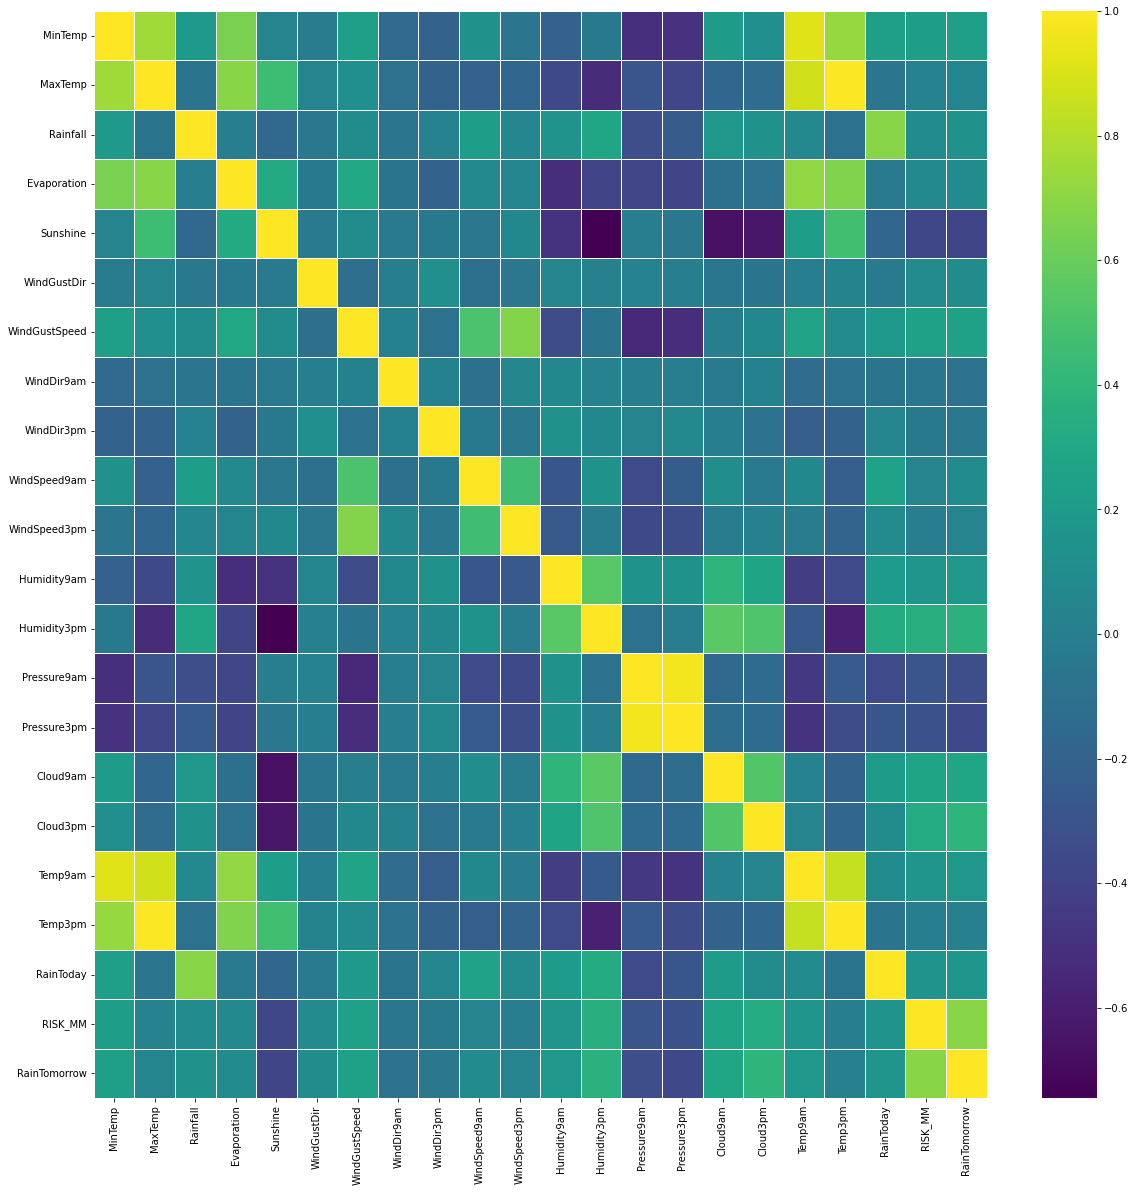

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataLogistic.corr(), linewidths=0.5, annot=False, fmt = ".2f", cmap='viridis')

# Linewidths untuk tebal garis
# linecolor untuk garis di luar visualisasi
# annot untuk label tiap baris
# cmap untuk pilih tema warna
# lihat pilihan warna di seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html

In [23]:
# Menentukan nilai x dan y

X = dataLogistic.drop(['RainTomorrow'], axis=1)
y = dataLogistic['RainTomorrow']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 219
Length of Testing Data: 147


#### Data Modeling

In [24]:
# Memasukkan data ke dalam model Logistic Regression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### Evaluasi

In [25]:
# True Positive: prediksi hujan, dan turun hujan
# True Negative: prediksi tidak hujan, dan tidak turun hujan

Accuracy :  0.9863945578231292


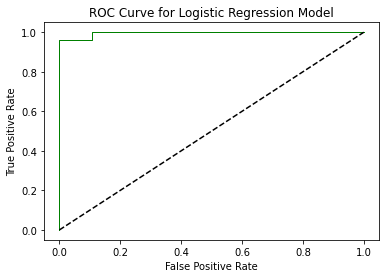

In [26]:
print("Accuracy : ", logreg.score(X_test, y_test))

from sklearn.metrics import roc_curve

y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, '-g', linewidth=1)
plt.plot([0, 1], [0,1], 'k--')
plt.title('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# TUGAS
#### Dengan menggunakan dataset lain yaitu : harga_mobil.csv lakukan prediksi harga dengan menggunakan metode Linier Regression dan Logistic Regression

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [27]:
car = pd.read_csv("harga_mobil.csv")
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Data Preprocessing

In [29]:
# Replace NaN value with Mean

car['normalized-losses'] = car['normalized-losses'].fillna(car['normalized-losses'].mean())
car['bore'] = car['bore'].fillna(car['bore'].mean())
car['stroke'] = car['stroke'].fillna(car['stroke'].mean())
car['horsepower'] = car['horsepower'].fillna(car['horsepower'].mean())
car['peak-rpm'] = car['peak-rpm'].fillna(car['peak-rpm'].mean())
car.info()
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [44]:
# Encoding
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(car[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

car['make'].replace(encode_data('make'), inplace = True)
car['fuel-type'].replace(encode_data('fuel-type'), inplace = True)
car['aspiration'].replace(encode_data('aspiration'), inplace = True)
car['num-of-doors'].replace(encode_data('num-of-doors'), inplace = True)
car['body-style'].replace(encode_data('body-style'), inplace = True)
car['drive-wheels'].replace(encode_data('drive-wheels'), inplace = True)
car['engine-location'].replace(encode_data('engine-location'), inplace = True)
car['fuel-system'].replace(encode_data('fuel-system'), inplace = True)
car['engine-type'].replace(encode_data('engine-type'), inplace = True)
car['num-of-cylinders'].replace(encode_data('num-of-cylinders'), inplace = True)

In [45]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,0,0,0.0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,0,0,0.0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,0,0,0.0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,0,0,1.0,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,0,0,1.0,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [46]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num-of-doors       201 non-null    float64
 6   body-style         201 non-null    int64  
 7   drive-wheels       201 non-null    int64  
 8   engine-location    201 non-null    int64  
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    int64  
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non

# Linear Regression

#### Menentukan variable x dan y

In [47]:
# Prediksi price berdasarkan horsepower
# price menjadi dependent variable(y) dan horsepower menjadi independent variable (x)

pricePred = car[['engine-size', 'price']]
pricePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   engine-size  201 non-null    int64
 1   price        201 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


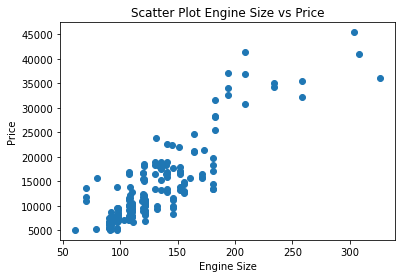

In [31]:
# Melihat korelasi data dengan Scatter plot

plt.scatter(pricePred['engine-size'], pricePred['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter Plot Engine Size vs Price')
plt.show()

Pada scatter plot tersebut dapat dilihat bahwa hubungan dari engine size dan price memiliki korelasi positif yang signifikan. Dari gambar tersebut terlihat bahwa semakin besar engine size pada sebuah mobil, maka price juga cenderung meningkat.

#### Data Modeling

In [32]:
x = pricePred['engine-size'].values.reshape(-1, 1)
y = pricePred['price'].values.reshape(-1, 1)

In [33]:
# training & testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
print("The accuracy score of Linear Regression model is: ", LinReg.score(X_test, y_test))

The accuracy score of Linear Regression model is:  0.7717982634822901


# Logistic Regression

<AxesSubplot:>

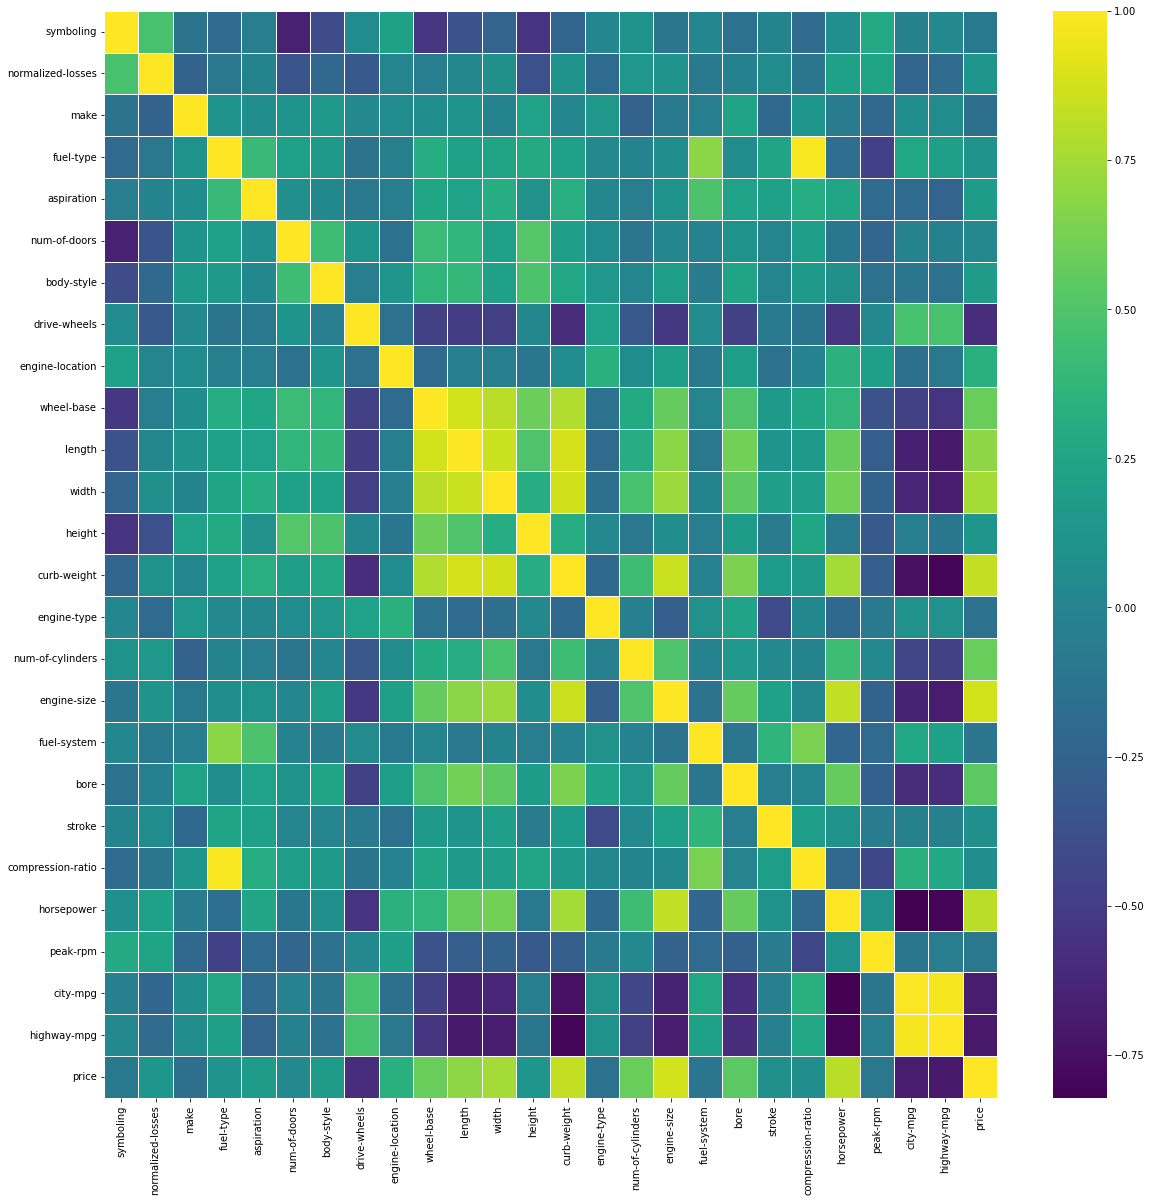

In [48]:
# Correlation Analysis
plt.figure(figsize=(20, 20))
sns.heatmap(car.corr(), linewidths=0.5, annot=False, fmt = ".2f", cmap='viridis')

#### Modeling

In [56]:
# Menentukan nilai x dan y

x = car.drop(['price'], axis=1)
Y = car['price']


x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.4, random_state=0)

print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 120
Length of Testing Data: 81


In [57]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, Y_train)

LogisticRegression(solver='liblinear')

#### Evaluation

In [58]:
print("Accuracy : ", logreg.score(x_test, Y_test))

Accuracy :  0.012345679012345678


In [59]:
!jupyter nbconvert --to html "./IS5411_CLHY_00000053580_Rendy Wirawan Tamrin_Week-04.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IS5411_CLHY_00000053580_Rendy Wirawan Tamrin_Week-04.ipynb to html
[NbConvertApp] Writing 933689 bytes to IS5411_CLHY_00000053580_Rendy Wirawan Tamrin_Week-04.html
